<a href="https://colab.research.google.com/github/Riteesh1999/AI-ML-Projects/blob/main/Fashion_Data_Set_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Flatten, Dense
# import tensorflow.keras.models as models
# import tensorflow.keras.optimizers as optimizers

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print("X_train data_type: " , X_train_full.dtype)
print("X_train shape: " , X_train_full.shape)

print("y_train shape: " , y_train_full.shape)
print("y_train daya_type: " , y_train_full.dtype)

X_train data_type:  uint8
X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
y_train daya_type:  uint8


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[2]]

'Sneaker'

In [43]:
model = Sequential([
    # Pooling and Dense layers
    Flatten(input_shape=[28, 28]),
    Dense(12, activation='relu'),      # Add a dense layer with 128 units and ReLU activation
    Dense(11, activation='relu'),       # Add a dense layer with 64 units and ReLU activation
    Dense(10, activation='softmax')      # Output layer with 3 units and softmax activation
])

In [44]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 12)                9420      
                                                                 
 dense_30 (Dense)            (None, 11)                143       
                                                                 
 dense_31 (Dense)            (None, 10)                120       
                                                                 
Total params: 9683 (37.82 KB)
Trainable params: 9683 (37.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=Adam(learning_rate=0.0001))

In [58]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=0.001 ,  restore_best_weights=True)
model_hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2609 - accuracy: 0.9052 - val_loss: 0.3901 - val_accuracy: 0.8774
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9064 - val_loss: 0.3947 - val_accuracy: 0.8716
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9070 - val_loss: 0.3943 - val_accuracy: 0.8740
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9067 - val_loss: 0.3950 - val_accuracy: 0.8738
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2577 - accuracy: 0.9070 - val_loss: 0.3972 - val_accuracy: 0.8742
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9063 - val_loss: 0.3975 - val_accuracy: 0.8752
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2575 - accuracy: 0.9067 - val_loss: 0.3974 - val_accuracy:

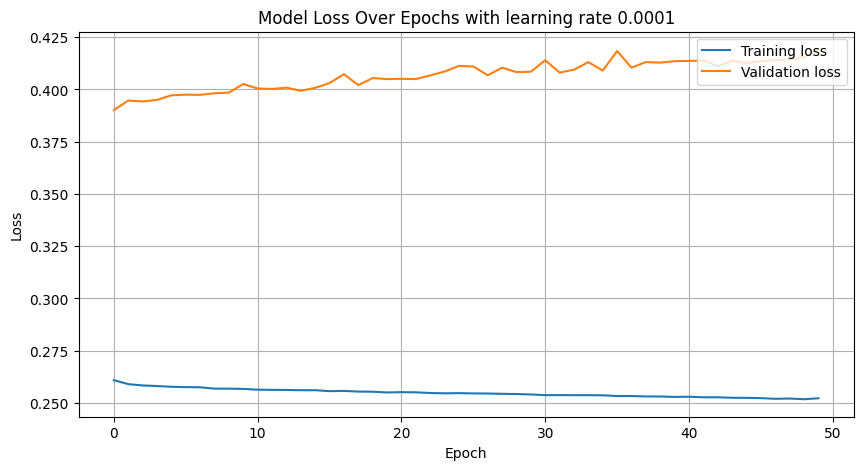

In [61]:
#Plotting Epochs Vs Loss to check whether Gradient Descent(Back Prop) is working
plt.figure(figsize=(10, 5))
plt.plot(model_hist.history['loss'], label='Training loss')
plt.plot(model_hist.history['val_loss'], label='Validation loss')
plt.title('Model Loss Over Epochs with learning rate 0.0001')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

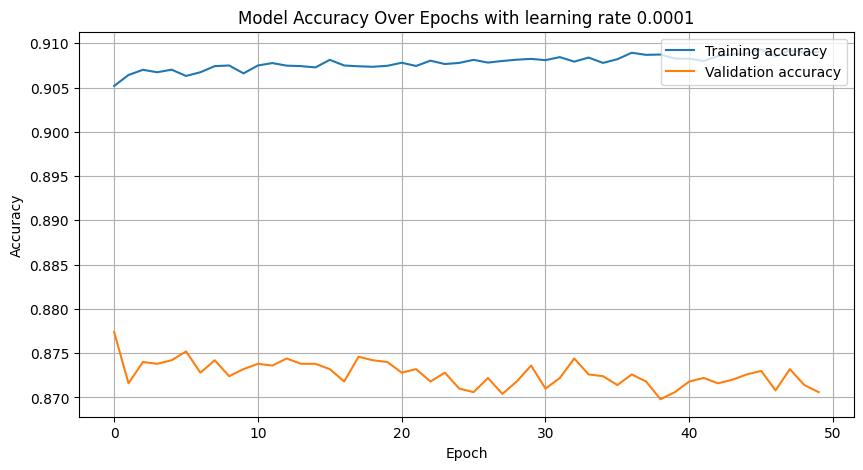

In [62]:
#Plotting Epochs Vs Loss to check whether Gradient Descent(Back Prop) is working
plt.figure(figsize=(10, 5))
plt.plot(model_hist.history['accuracy'], label='Training accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy Over Epochs with learning rate 0.0001')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.8562


[0.46329042315483093, 0.8561999797821045]

In [75]:
X_new = X_test[:10]
y_pred = model.predict(X_new)
class_predictions = np.argmax(y_pred, axis=1)
class_name_predictions = [class_names[label] for label in class_predictions]
print(class_predictions)
print(class_name_predictions)


1/1 [==============================] - 0s 22ms/step
[9 2 1 1 6 1 4 6 5 7]
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [73]:
def display_predictions(images, class_name_predictions):
    plt.figure(figsize=(10, 10))

    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(class_name_predictions[i])
        plt.axis('off')

    plt.show()


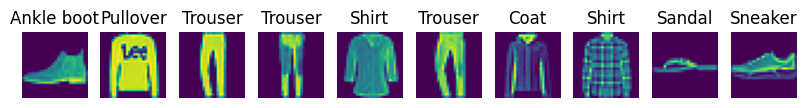

In [76]:
display_predictions(X_new, class_name_predictions)

In [79]:
y_pred_full = model.predict(X_test)
class_predictions_full = np.argmax(y_pred_full, axis=1)
conf_matrix = confusion_matrix(y_test, class_predictions_full)

# Calculate TP, TN, FP, FN for each class
num_classes = len(class_names)
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

for i in range(num_classes):
    TP[i] = conf_matrix[i, i]
    FP[i] = conf_matrix[:, i].sum() - TP[i]
    FN[i] = conf_matrix[i, :].sum() - TP[i]
    TN[i] = conf_matrix.sum() - (FP[i] + FN[i] + TP[i])

# Display the results
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"True Positives (TP): {TP[i]}")
    print(f"False Positives (FP): {FP[i]}")
    print(f"False Negatives (FN): {FN[i]}")
    print(f"True Negatives (TN): {TN[i]}")
    print("")


313/313 [==============================] - 0s 1ms/step
Class: T-shirt/top
True Positives (TP): 817.0
False Positives (FP): 202.0
False Negatives (FN): 183.0
True Negatives (TN): 8798.0

Class: Trouser
True Positives (TP): 962.0
False Positives (FP): 32.0
False Negatives (FN): 38.0
True Negatives (TN): 8968.0

Class: Pullover
True Positives (TP): 763.0
False Positives (FP): 226.0
False Negatives (FN): 237.0
True Negatives (TN): 8774.0

Class: Dress
True Positives (TP): 863.0
False Positives (FP): 174.0
False Negatives (FN): 137.0
True Negatives (TN): 8826.0

Class: Coat
True Positives (TP): 791.0
False Positives (FP): 249.0
False Negatives (FN): 209.0
True Negatives (TN): 8751.0

Class: Sandal
True Positives (TP): 945.0
False Positives (FP): 62.0
False Negatives (FN): 55.0
True Negatives (TN): 8938.0

Class: Shirt
True Positives (TP): 612.0
False Positives (FP): 287.0
False Negatives (FN): 388.0
True Negatives (TN): 8713.0

Class: Sneaker
True Positives (TP): 924.0
False Positives (FP):